In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [205]:
spray = pd.read_csv('./data/west_nile/input/spray.csv')

In [206]:
train = pd.read_csv('./data/west_nile/input/train.csv')

In [207]:
weather = pd.read_csv('./data/west_nile/input/weather.csv')

In [208]:
test = pd.read_csv('./data/west_nile/input/test.csv')

In [209]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [210]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [212]:
test.info()
#test does not have NumMosquitos. to remove from training.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [213]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [214]:
#look at trap with most mosquito **trap is important feature
trapwnv = train.groupby('Trap').mean()['WnvPresent']
(trapwnv == 0).sum()/float(len(trapwnv))
#29% of traps have no wnv present before

0.2867647058823529

In [215]:
#top 5 traps
trapwnv.sort_values(ascending=False).head(5)

Trap
T143    0.193548
T006    0.166667
T005    0.142857
T233    0.140000
T014    0.133333
Name: WnvPresent, dtype: float64

In [216]:
#find satellite traps and replace
# traintrap = train['Trap'].unique()
# testtrap = test['Trap'].unique()
# for trap in testtrap:
#     if trap not in traintrap:
#         print trap

In [217]:
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.date 
train['month'] = train['Date'].map(lambda x: x.month)
train['year'] = train['Date'].map(lambda x: x.year)

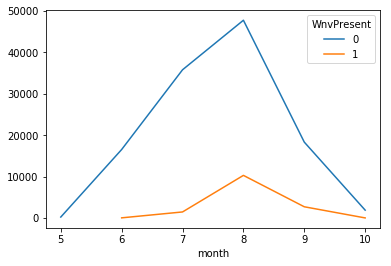

In [218]:
#theres is seasonality in the mosquito present **month is important feature
train.groupby(['month','WnvPresent']).sum().unstack()['NumMosquitos'].plot()

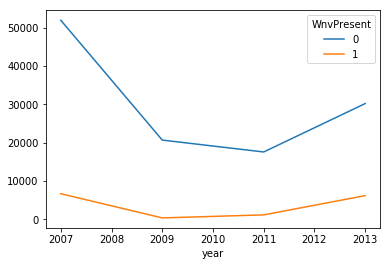

In [219]:
train.groupby(['year','WnvPresent']).sum().unstack()['NumMosquitos'].plot()

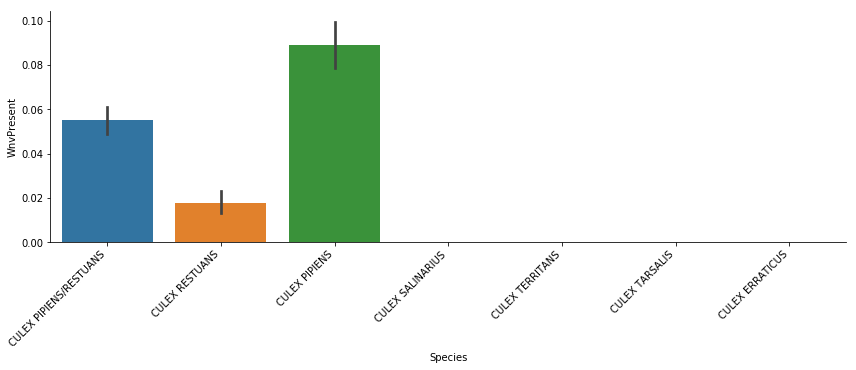

In [220]:
#species play an important part as well **species is important feature
sns.factorplot(x='Species', y='WnvPresent', 
               data=train, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

In [221]:
weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [222]:
weather.columns.values

array(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'], dtype=object)

In [223]:
weatherobj = weather.select_dtypes('O')

In [224]:
#drop columns with too many missing values
for column in weatherobj.columns:
    print column, (weatherobj[column] == 'M').sum()

Date 0
Tavg 11
Depart 1472
WetBulb 4
Heat 11
Cool 11
Sunrise 0
Sunset 0
CodeSum 0
Depth 1472
Water1 2944
SnowFall 1472
PrecipTotal 2
StnPressure 4
SeaLevel 9
AvgSpeed 3


In [225]:
#select station1 only and weather numeric columns for easier interpretation
weather_2 = weather[weather['Station'] == 1]
weather_2 = weather_2.select_dtypes(include=np.number)
#select some object columns
weather_2[['Date','Tavg','AvgSpeed','CodeSum']] = weather[['Date','Tavg','AvgSpeed','CodeSum']]
#convert date
weather_2['Date'] = pd.to_datetime(weather_2['Date'])
weather_2['Date'] = weather_2['Date'].dt.date
#get temperature diff
weather_2['tempdiff'] = weather_2['Tmax'] - weather_2['Tmin']

In [226]:
df = pd.merge(train, weather_2, how='left', on='Date') 

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 24 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
month                     10506 non-null int64
year                      10506 non-null int64
Station                   10506 non-null int64
Tmax                      10506 non-null int64
Tmin                      10506 non-null int64
DewPoint                  10506 non-null int64
ResultSpeed               10506 non

In [228]:
#convert to object
df['month'] = df['month'].astype('object')
#convert to numeric
df['Tavg'] = df['Tavg'].astype('int')
df['AvgSpeed'] = df['AvgSpeed'].astype('float64')

In [229]:
#drop irrelevant columns
df = df.drop(['Address','AddressNumberAndStreet','Street','Trap','NumMosquitos','Block','Date','AddressAccuracy','ResultDir','AvgSpeed','CodeSum'], axis=1) #test set doesnt have no.mosquitos

In [230]:
objdf = df.select_dtypes('O')
numdf = df.select_dtypes(include=np.number)

In [231]:
#get dummies
dummies = pd.get_dummies(objdf, drop_first = True)
df_clean = numdf.merge(dummies, left_index = True, right_index = True,how = 'outer')#merge back
df_clean['WnvPresent'] = df_clean['WnvPresent'].astype('int')

In [29]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('WnvPresent', axis=1)
y = df_clean['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #can add in stratify=y

In [30]:
#baseline
y_train.value_counts()/len(y_train)

0    0.947525
1    0.052475
Name: WnvPresent, dtype: float64

## RandomForest

In [31]:
#use a randomized search due to large number of parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print rf_random.best_score_
print rf_random.best_params_
#model score is not much higher than baseline of 94.8%

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   35.5s finished


0.9482389338410281
{'min_samples_split': 2, 'max_features': 'auto', 'bootstrap': True, 'max_depth': 60, 'min_samples_leaf': 4}


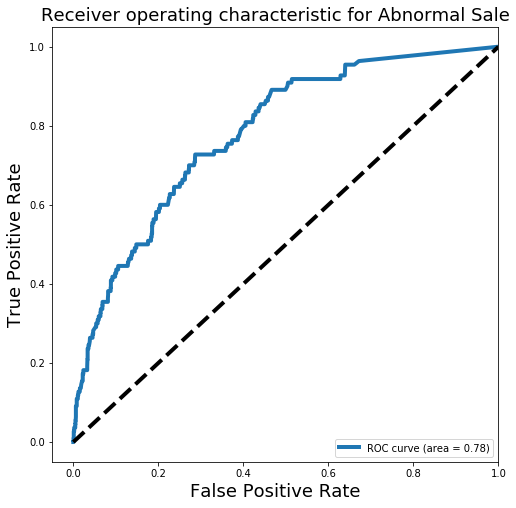

auc: 0.7823703906535232


In [33]:
#predict probability
Y_pp = pd.DataFrame(rf_random.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
#roc, auc for model for common performance measurement
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (abnormal sale).
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Abnormal Sale', fontsize=18)
plt.legend(loc="lower right")
plt.show()
print 'auc:',roc_auc

In [34]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

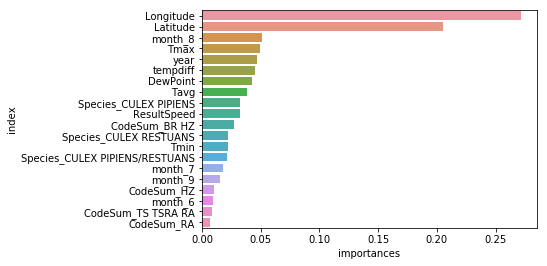

In [35]:
rf2 = RandomForestClassifier(min_samples_split= 2,
                             max_features= 'auto',
                             bootstrap= True,
                             max_depth= 10,
                             min_samples_leaf= 4)
rf2.fit(X_train, y_train)
importances = rf2.feature_importances_
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
fea_imp = pd.DataFrame(zip(importances,std), X_train.columns.values, columns = ['importances', 'std'])
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:20])

In [36]:
from sklearn.metrics import classification_report
def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, 
                            y_pred, 
                            rownames=['Actual'], 
                            colnames=['Predicted'], 
                            margins=True)
    print confusion
    print classification_report(y_true, y_pred)

y_pred = rf2.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted     0  1   All
Actual                  
0          1989  3  1992
1           108  2   110
All        2097  5  2102
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1992
          1       0.40      0.02      0.03       110

avg / total       0.92      0.95      0.92      2102



## Try XGBoost

In [37]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [38]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [39]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [40]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )
# Here we go
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   43.9s finished


RandomizedSearchCV(cv=<generator object split at 0x000000000DFC6FC0>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=5, n_jobs=4,
          param_distributions={'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 1, 1.5, 2, 5], 'min_child_weight': [1, 5, 10], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [41]:
print random_search.best_score_

0.8419588113992259


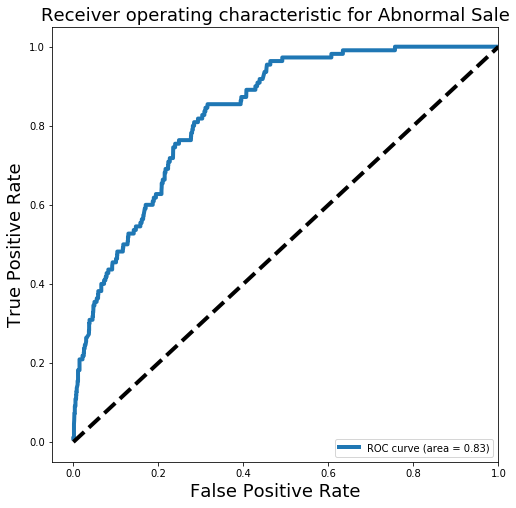

auc: 0.8343373493975904


In [42]:
#predict probability
Y_pp = pd.DataFrame(random_search.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
#roc, auc for model for common performance measurement
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (abnormal sale).
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Abnormal Sale', fontsize=18)
plt.legend(loc="lower right")
plt.show()
print 'auc:',roc_auc

In [43]:
print random_search.best_params_

{'subsample': 0.8, 'gamma': 1, 'colsample_bytree': 1.0, 'max_depth': 4, 'min_child_weight': 1}


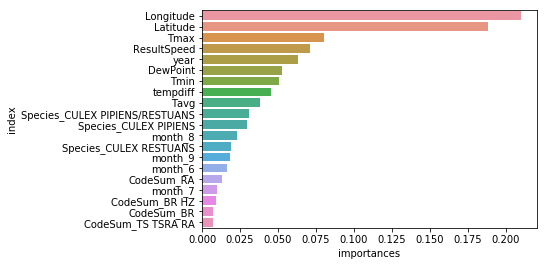

In [44]:
xgb = XGBClassifier(subsample=0.8,
                    gamma=1,
                    colsample_bytree=0.8,
                    max_depth=5,
                    min_child_weight=5)
xgb.fit(X_train, y_train)
fea_imp = pd.DataFrame(xgb.feature_importances_, X_train.columns.values, columns=['importances'])
fea_imp = fea_imp[fea_imp['importances'] != 0]
fea_imp = fea_imp.sort_values('importances', ascending=False)
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:20])

In [45]:
y_pred = random_search.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted     0   1   All
Actual                   
0          1988   4  1992
1           104   6   110
All        2092  10  2102
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1992
          1       0.60      0.05      0.10       110

avg / total       0.93      0.95      0.93      2102



C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Upsample with XGBoost

In [46]:
training = pd.concat([X_train, y_train], axis=1)
training.head(1)

,Latitude,Longitude,year,Station,Tmax,Tmin,DewPoint,ResultSpeed,Tavg,tempdiff,...,CodeSum_TS BR,CodeSum_TS RA,CodeSum_TS TSRA BR,CodeSum_TS TSRA RA,CodeSum_TS TSRA RA FG BR HZ,CodeSum_TSRA BR HZ VCTS,CodeSum_TSRA RA,CodeSum_TSRA RA BR,CodeSum_TSRA RA BR VCTS,WnvPresent
10305,41.867108,-87.654224,2013,1,84,69,68,8.3,77,15,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df_majority = training[training.WnvPresent==0] 
df_minority = training[training.WnvPresent==1] 

In [48]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts percentage
df_upsampled.WnvPresent.value_counts()/len(df_upsampled)

1    0.5
0    0.5
Name: WnvPresent, dtype: float64

In [49]:
X_train_up = df_upsampled.drop('WnvPresent', axis=1)
y_train_up = df_upsampled['WnvPresent']

In [50]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [51]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_up, y_train_up), verbose=3, random_state=1001 )
# Here we go
random_search.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.2min finished


RandomizedSearchCV(cv=<generator object split at 0x000000000E25A3F0>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=5, n_jobs=4,
          param_distributions={'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 1, 1.5, 2, 5], 'min_child_weight': [1, 5, 10], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [52]:
print random_search.best_score_

0.9450571611581706


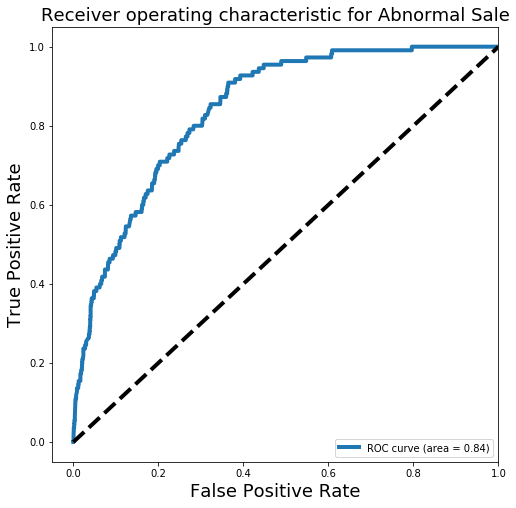

auc: 0.8429445052939029


In [53]:
#predict probability
Y_pp = pd.DataFrame(random_search.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
#roc, auc for model for common performance measurement
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (abnormal sale).
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Abnormal Sale', fontsize=18)
plt.legend(loc="lower right")
plt.show()
print 'auc:',roc_auc

In [54]:
print random_search.best_params_

{'subsample': 0.6, 'gamma': 1.5, 'colsample_bytree': 0.8, 'max_depth': 5, 'min_child_weight': 1}


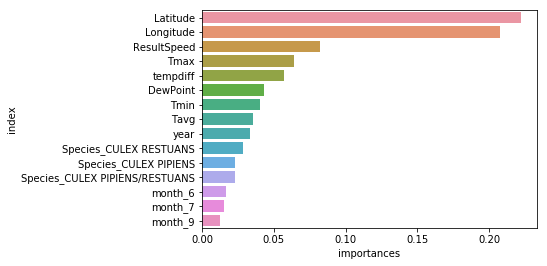

In [55]:
xgb = XGBClassifier(subsample=0.6,
                    gamma=1.5,
                    colsample_bytree=0.8,
                    max_depth=5,
                    min_child_weight=1)
xgb.fit(X_train_up, y_train_up)
fea_imp = pd.DataFrame(xgb.feature_importances_, X_train.columns.values, columns=['importances'])
fea_imp = fea_imp[fea_imp['importances'] != 0]
fea_imp = fea_imp.sort_values('importances', ascending=False)
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:15])

In [56]:
y_pred = random_search.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted     0    1   All
Actual                    
0          1638  354  1992
1            40   70   110
All        1678  424  2102
             precision    recall  f1-score   support

          0       0.98      0.82      0.89      1992
          1       0.17      0.64      0.26       110

avg / total       0.93      0.81      0.86      2102



C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## For kaggle submission

In [232]:
test2 = pd.read_csv('./data/west_nile/input/test.csv')
test2['Date'] = pd.to_datetime(test2['Date'])
test2['Date'] = test2['Date'].dt.date 
test2['month'] = test2['Date'].map(lambda x: x.month)
test2['year'] = test2['Date'].map(lambda x: x.year)

In [233]:
df2 = pd.merge(test2, weather_2, how='left', on='Date') 

In [234]:
#convert to object
df2['month'] = df2['month'].astype('object')
#convert to numeric
df2['Tavg'] = df2['Tavg'].astype('int')
df2['AvgSpeed'] = df2['AvgSpeed'].astype('float64')

In [235]:
df2.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'month', u'year', u'Station', u'Tmax', u'Tmin',
       u'DewPoint', u'ResultSpeed', u'ResultDir', u'Tavg', u'AvgSpeed',
       u'CodeSum', u'tempdiff'],
      dtype='object')

In [236]:
#drop irrelevant columns
df2 = df2.drop(['Address','AddressNumberAndStreet','Trap','Street','Block','Date','AddressAccuracy','ResultDir','AvgSpeed','CodeSum'], axis=1) #test set doesnt have no.mosquitos

In [237]:
objdf = df2.select_dtypes('O')
numdf = df2.select_dtypes(include=np.number)

In [238]:
#get dummies
dummies = pd.get_dummies(objdf, drop_first = True)
df2_clean = numdf.merge(dummies, left_index = True, right_index = True,how = 'outer')#merge back

In [239]:
df2_clean = df2_clean.drop('Species_UNSPECIFIED CULEX', axis=1)

In [240]:
df2_clean.head(1)

,Id,Latitude,Longitude,year,Station,Tmax,Tmin,DewPoint,ResultSpeed,Tavg,...,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,month_7,month_8,month_9,month_10
0,1,41.95469,-87.800991,2008,1,86,61,56,8.9,74,...,0,1,0,0,0,0,0,0,0,0


In [241]:
df_majority = df_clean[df_clean.WnvPresent==0] 
df_minority = df_clean[df_clean.WnvPresent==1] 

In [242]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts percentage
df_upsampled.WnvPresent.value_counts()/len(df_upsampled)

1    0.5
0    0.5
Name: WnvPresent, dtype: float64

In [243]:
X_train_up = df_upsampled.drop('WnvPresent', axis=1)
y_train_up = df_upsampled['WnvPresent']

In [244]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [252]:
X_train_up = X_train_up.drop('month_6', axis=1)

In [253]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_up, y_train_up), verbose=3, random_state=1001 )
# Here we go
random_search.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.1min finished


RandomizedSearchCV(cv=<generator object split at 0x0000000017ABB900>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=5, n_jobs=4,
          param_distributions={'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 1, 1.5, 2, 5], 'min_child_weight': [1, 5, 10], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [246]:
print random_search.best_params_

{'subsample': 0.6, 'gamma': 1.5, 'colsample_bytree': 0.8, 'max_depth': 5, 'min_child_weight': 1}


In [248]:
df2_clean.columns

Index([u'Id', u'Latitude', u'Longitude', u'year', u'Station', u'Tmax', u'Tmin',
       u'DewPoint', u'ResultSpeed', u'Tavg', u'tempdiff',
       u'Species_CULEX PIPIENS', u'Species_CULEX PIPIENS/RESTUANS',
       u'Species_CULEX RESTUANS', u'Species_CULEX SALINARIUS',
       u'Species_CULEX TARSALIS', u'Species_CULEX TERRITANS', u'month_7',
       u'month_8', u'month_9', u'month_10'],
      dtype='object')

In [249]:
X_train_up.columns

Index([u'Latitude', u'Longitude', u'year', u'Station', u'Tmax', u'Tmin',
       u'DewPoint', u'ResultSpeed', u'Tavg', u'tempdiff',
       u'Species_CULEX PIPIENS', u'Species_CULEX PIPIENS/RESTUANS',
       u'Species_CULEX RESTUANS', u'Species_CULEX SALINARIUS',
       u'Species_CULEX TARSALIS', u'Species_CULEX TERRITANS', u'month_6',
       u'month_7', u'month_8', u'month_9', u'month_10'],
      dtype='object')

In [254]:
y_pred = random_search.predict_proba(df2_clean.drop('Id',axis=1))

In [265]:
y_pred[:,1]

array([0.13646068, 0.06888465, 0.06876602, ..., 0.01988432, 0.01988432,
       0.01988432], dtype=float32)

In [261]:
virus_proba = y_pred[:,1]

In [262]:
len(virus_proba)

116293

In [263]:
np.savetxt('virus_proba.csv', virus_proba, delimiter=',')